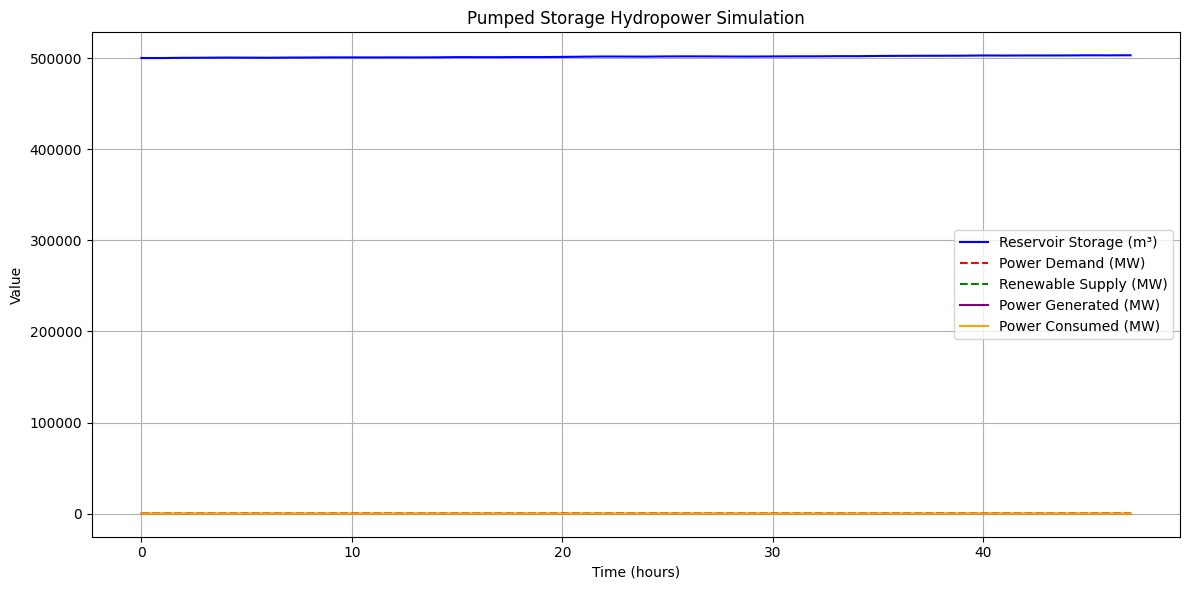

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the PSH system
reservoir_capacity_m3 = 1_000_000  # m^3
initial_storage_m3 = 500_000  # m^3
efficiency_pumping = 0.85
efficiency_generation = 0.90
density_water_kg_m3 = 1000  # kg/m^3
gravity_m_s2 = 9.81  # m/s^2
height_m = 100  # height difference

time_steps = 48  # 48 hours
power_demand_mw = np.random.uniform(30, 100, time_steps)  # Simulated demand
renewable_supply_mw = np.random.uniform(50, 120, time_steps)  # Simulated renewable supply

# Initialize storage and power arrays
storage_m3 = np.zeros(time_steps)
storage_m3[0] = initial_storage_m3
power_generated_mw = np.zeros(time_steps)
power_consumed_mw = np.zeros(time_steps)

# Calculate potential energy per cubic meter of water (MWh/m3)
energy_per_m3_mwh = (density_water_kg_m3 * gravity_m_s2 * height_m) / (3.6e6)  # Convert J to MWh

# Simulate PSH operations
def simulate_psh():
    for t in range(1, time_steps):
        net_power = renewable_supply_mw[t] - power_demand_mw[t]

        if net_power > 0:
            # Use excess power to pump water
            energy_available_mwh = net_power * (1 / efficiency_pumping)
            water_pumped_m3 = energy_available_mwh / energy_per_m3_mwh
            water_pumped_m3 = min(water_pumped_m3, reservoir_capacity_m3 - storage_m3[t-1])
            storage_m3[t] = storage_m3[t-1] + water_pumped_m3
            power_consumed_mw[t] = net_power
            power_generated_mw[t] = 0

        else:
            # Generate power by releasing water
            energy_needed_mwh = abs(net_power) / efficiency_generation
            water_released_m3 = energy_needed_mwh / energy_per_m3_mwh
            water_released_m3 = min(water_released_m3, storage_m3[t-1])
            storage_m3[t] = storage_m3[t-1] - water_released_m3
            power_generated_mw[t] = abs(net_power)
            power_consumed_mw[t] = 0

# Run simulation
simulate_psh()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(storage_m3, label="Reservoir Storage (m³)", color="blue")
plt.plot(power_demand_mw, label="Power Demand (MW)", color="red", linestyle="--")
plt.plot(renewable_supply_mw, label="Renewable Supply (MW)", color="green", linestyle="--")
plt.plot(power_generated_mw, label="Power Generated (MW)", color="purple")
plt.plot(power_consumed_mw, label="Power Consumed (MW)", color="orange")
plt.xlabel("Time (hours)")
plt.ylabel("Value")
plt.title("Pumped Storage Hydropower Simulation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
power_demand_mw

array([79.75791443, 30.56078993, 97.58716187, 48.13521916, 91.66112714,
       30.94761992, 44.7558084 , 74.31711915, 92.01613985, 83.65644982,
       90.76404712, 88.9807376 , 72.00465684, 37.10240222, 70.0776927 ,
       96.57613702, 49.60395184, 81.91967138, 36.89149475, 43.38890146,
       95.8749384 , 66.80280673, 45.40836257, 68.05614731, 31.9566066 ,
       93.01164131, 60.96515028, 30.89738334, 66.51312883, 67.13823414,
       58.426519  , 44.34236936, 85.08007634, 83.7199284 , 53.90427413,
       95.71912795, 42.79929509, 36.89228355, 92.28525399, 78.52684514,
       67.8579754 , 57.48508724, 98.71150803, 50.87846473, 64.18385013,
       81.90849394, 59.91930949, 98.43147364])

In [3]:
renewable_supply_mw

array([ 90.06289731,  57.57269135,  96.82931272,  88.423158  ,
       108.33953904,  67.36262668,  68.54451129, 105.2674604 ,
       108.24954607,  69.84056598,  83.2814662 ,  75.71699301,
        76.09688161,  95.86440299,  60.46760371,  70.95075867,
        57.05282395,  69.04928819,  62.33647203, 109.20888585,
        90.93721378,  51.83688711,  57.52468299, 104.33693932,
        76.51847504,  80.3102218 ,  59.58662833,  66.73301546,
        62.21245751,  99.23956931,  60.18229708,  67.01505363,
        80.0594895 , 105.54514262, 117.73751738, 108.21740293,
        92.86538057,  65.91504808, 102.86059696,  62.07475657,
        68.02932466,  54.02916231, 104.55732239,  98.3788573 ,
        87.63021575,  65.5830014 ,  80.66538933,  74.0790273 ])